# Project 2: Exploratory Data Analysis of the Abalone Dataset #

**Members:**
*Kunming Song,
Mhariadora Bocalbos,
Renzhu Li*

## Part 1: Introduction ##

Abalones are marine creatures and also known by other names such as ear shells, sea ears, and sea snails. Majority of the species can be found in the coasts of New Zealand, South Africa, Australia, Western North America, and Japan. They are very popular in Asian cuisines because of its health benefits. Abalones are good source of vital nutrients such as omega 3, iodine, and phosphorous. Moreover, it also tastes good and it is similar to wine in such a way that complex flavors develop as it age. This is the reason why the price of abalone is said to have a positive correlation with its age. However, predicting the age of an abalone is a tedious task. In order to do this, farmers need to cut the shells and count the rings through microscopes to estimate the age of the abalone. As such, some studies have been conducted to predict the age of the abalone by using its physical measurements such as length, diameter, height, and weight, to name a few. One of the studies we found while doing research about this provided the conclusion that the volume (length X diameter X height) of the abalone and its whole weight are good predictors of its age.

**Statement of the Problem:** This exploratory data analysis seeks to answer the following questions:
1. Is there a relationship between the individual attributes, that is, length, diameter, and height vs. the abalone's number of rings? 
2. Based on the conclusion of the study mentioned above, volume and whole weight are good predictors of age. Thus, we would like to know which one has a stronger relationship between the two. Is it volume or is it whole weight?
3. Lastly, the study also said that it is a better predictor when it comes to the infant or I sex group. Thus, we would like to know the effect of grouping the dataset by sex and comparing the relationship between volume and whole weight and the number of rings to confirm the results of the previous study.

## Part 2: Data Summary ##

The dataset came from the UCI Machine Learning repository. The original dataset contains 4177 rows and 9 attributes. These attributes are:

- Sex: nominal and regular with values M (male), F (female), I (infant)
- Length (in mm): numerical and continuous and is defined as the longest shell measurement
- Diameter (in mm): numerical and continuous and is defined as the measure perpendicular to its length
- Height (in mm): numerical and continuous and is defined as the measure with meat in shell
- Whole weight (in grams): numerical and continuous and is defined as the weight of the whole abalone
- Shucked weight (in grams): numerical and continuous and is defined as the weight of the meat
- Viscera weight (in grams): numerical and continuous and is defined as the gut weight (after bleeding)
- Shell weight (in grams): numerical and continuous and is defined as the shell weight after being dried
- Rings: numerical and integer and is defined as the abalone's number of rings (+1.5 gives the age in years)

For the purpose of this project, only a subset of the attributes will be used. These will be: Sex, Length, Diameter, Height, Whole Weight, and Rings. In addition to this, a new attribute, Volume (calculated as Length X Diameter X Height) will be calculated.

Initially, the dataset contains 4177 rows therefore there will be 4177 use cases for the study and also for each attribute. If we find some missing values or values that does not seem to be valid with respect to its definition, the number of use cases may change and will be explained further as we proceed with doing the analysis of this dataset.

### Data Initialization: ###

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#gets data from the original source
ab=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)
ab.head() #prints sample of the data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#adds column names to the dataset
ab.columns=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
ab.head(10) #prints sample of dataset with column names

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### Creating Subset of the Original Dataset: ###

In [4]:
#slicing the columns to only get the attributes that will be used in this data analysis
ab1 = ab[['Sex','Length','Diameter','Height','Whole_weight','Rings']]
ab1.head() #prints sample of the new dataset

,Sex,Length,Diameter,Height,Whole_weight,Rings
0,M,0.455,0.365,0.095,0.5140,15
1,M,0.350,0.265,0.090,0.2255,7
2,F,0.530,0.420,0.135,0.6770,9
3,M,0.440,0.365,0.125,0.5160,10
4,I,0.330,0.255,0.080,0.2050,7


#### Checking for nulls: ####

In [5]:
ab1.columns[ab1.isnull().any()]

Index([], dtype='object')

In [6]:
ab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 6 columns):
Sex             4177 non-null object
Length          4177 non-null float64
Diameter        4177 non-null float64
Height          4177 non-null float64
Whole_weight    4177 non-null float64
Rings           4177 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 195.9+ KB


Checked for nulls and missing values. Based on the results above, the dataset does not contain any nulls or missing values. At this point, the number of use cases for the analysis and for all attributes is still the same at 4177.

#### Checking for invalid values: ####

In [7]:
ab1['Sex'].unique() #checks unique values for sex

array(['M', 'F', 'I'], dtype=object)

The unique values, based on the definition of the attribute sex in the data dictionary is as expected. Thus, the number of use cases for the analysis and for all attributes is still the same at 4177.

#### Checking if length, diameter, height, and whole weight has zero values: ####

To do this, we checked on the minimum or lowest value for the attributes. A length, diameter, height, and whole weight of zero is invalid for these attributes since a value of zero means that the abalone does not exist.

In [8]:
ab1.min() #gets minimum value for all attributes

Sex                 F
Length          0.075
Diameter        0.055
Height              0
Whole_weight    0.002
Rings               1
dtype: object

Based on the results, the height contains a minimum value of 0. This is not valid and when we do calculation for volume since formula for volume is length X diameter X height, this will also result to a 0 volume. The next step is to find how many rows for height contain a zero value.

In [9]:
zero_height = ab1[ab1['Height']==0].count()['Height'] #gets count of records with zero height
zero_height

2

Since there are only 2 rows that have 0 height, the group decided to just filter out these two rows for now. As such, the number of use cases for this analysis and for all the attributes will now be 4175.

### Filtered Dataset: ###

In [10]:
ab_nozero = ab1[ab1['Height']!=0] #filters out rows with zero height
ab_nozero.head() #prints sample of the data

,Sex,Length,Diameter,Height,Whole_weight,Rings
0,M,0.455,0.365,0.095,0.5140,15
1,M,0.350,0.265,0.090,0.2255,7
2,F,0.530,0.420,0.135,0.6770,9
3,M,0.440,0.365,0.125,0.5160,10
4,I,0.330,0.255,0.080,0.2050,7


In [11]:
print(len(ab_nozero)) #returns new count of dataset

4175


#### Adding the Volume column/attribute: ####

In [12]:
ab2 = ab_nozero.copy() #creates a copy of the filtered dataset
ab2.head()

,Sex,Length,Diameter,Height,Whole_weight,Rings
0,M,0.455,0.365,0.095,0.5140,15
1,M,0.350,0.265,0.090,0.2255,7
2,F,0.530,0.420,0.135,0.6770,9
3,M,0.440,0.365,0.125,0.5160,10
4,I,0.330,0.255,0.080,0.2050,7


In [13]:
ab2['Volume'] = ab2['Length'] * ab2['Diameter'] * ab2['Height'] #creates and calculates the Volume attribute
ab2.head() #prints a sample of the new dataset with the Volume attribute

,Sex,Length,Diameter,Height,Whole_weight,Rings,Volume
0,M,0.455,0.365,0.095,0.5140,15,0.015777
1,M,0.350,0.265,0.090,0.2255,7,0.008347
2,F,0.530,0.420,0.135,0.6770,9,0.030051
3,M,0.440,0.365,0.125,0.5160,10,0.020075
4,I,0.330,0.255,0.080,0.2050,7,0.006732


## Part 3: Exploratory Data Analysis (EDA) ##

#### Step 1: Run descriptive statistics for each attribute ####

Except for sex, the rest of the attributes (length, diameter, height, volume, whole weight, and rings) included in this dataset are numeric variables. These numeric variables are also mostly continuous except for rings that is an integer. For this reason, summary statistics will only be run for all numeric variables (length, diameter, height, volume, whole weight, and rings). For sex, the number of records for each category (Male, Female, and Infant) will be provided instead.

In [13]:
ab2.describe() #displays descriptive stats for all numeric variables

,Length,Diameter,Height,Whole_weight,Rings,Volume
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,9.935090,0.034732
std,0.120069,0.09922,0.041725,0.490349,3.224227,0.021145
min,0.075000,0.05500,0.010000,0.002000,1.000000,0.000041
25%,0.450000,0.35000,0.115000,0.442250,8.000000,0.017944
50%,0.545000,0.42500,0.140000,0.800000,9.000000,0.032886
75%,0.615000,0.48000,0.165000,1.153500,11.000000,0.048777
max,0.815000,0.65000,1.130000,2.825500,29.000000,0.205137


**Discussion of Results:**

- Length: The mean of the length attribute is 0.524065 while median is 0.545. Since the median is greater than the mean, this tells us that the shape of the distribution is skewed to the left. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.075 while max is at 0.815. However, by looking at the standard deviation, the observations seem to be not as far from its mean.
- Diameter: The mean of the diameter attribute is 0.40794 while median is 0.425. Since the median is greater than the mean, this tells us that the shape of the distribution is skewed to the left. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.055 while max is at 0.650. However, by looking at the standard deviation, the observations seem to be not as far from its mean.
- Height: The mean of the height attribute is 0.139583 while median is 0.140. Since the mean and median are almost equal, this tells us that the shape of the distribution is bell shaped or normal curve. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.010 while max is at 1.13000. However, by looking at the standard deviation, the observations seem to be not as far from its mean.
- Volume: The mean of the volume attribute is 0.034732 while median is 0.032886. Since the median is less than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.000041 while max is at 0.205137. However, by looking at the standard deviation, the observations seem to be not as far from its mean.
- Whole Weight: The mean of the whole weight attribute is 0.829005 while median is 0.800000. Since the median is less than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.002 while max is at 2.825500. However, by looking at the standard deviation, the observations seem to be not as far from its mean.
- Rings: The mean of the rings attribute is 9.935090 while median is 9.000000. This gives as an idea that mean age is approximately 11.4 while median age is at 10.5. Since the median is less than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 1 while max is at 29.

In [14]:
print(ab2['Sex'].value_counts())  #prints count for each sex category
print(ab2['Sex'].value_counts()/len(ab2)) #prints proportion of each sex category

M    1528
I    1340
F    1307
Name: Sex, dtype: int64
M    0.365988
I    0.320958
F    0.313054
Name: Sex, dtype: float64


**Discussion of Result:** This shows that for this dataset, around 36.6% are male abalones while 32.10% are infants and the rest are female abalones (31.3%)

#### Step 2: Provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn ####

Since sex is a categorical variable, the most appropriate chart to make is the bar chart. For the rest of our attributes, since they are numerical and continuous (length, diameter, width, volume, and whole weight) and integer (rings), the most appropriate chart is a box plot and/or a histogram. 

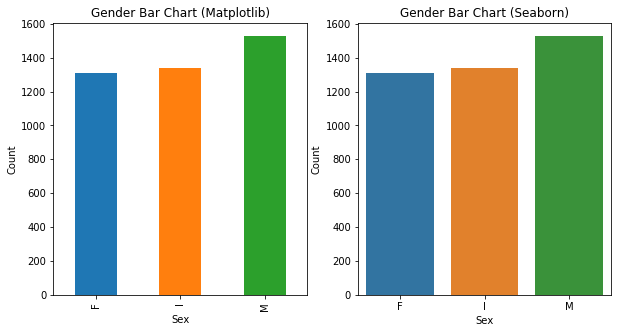

In [15]:
# side-by-side barplot Matplotlib and Seaborn for Sex attribute
# define a new figure for plotting
plt.figure(figsize=(10,5))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# matplotlib graph of Sex
#ab2['Sex'].value_counts().plot.bar()
gender_count = ab2.groupby('Sex').count()['Length']
gender_count.plot.bar();

# give the plot a title
plt.title('Gender Bar Chart (Matplotlib)')
plt.xlabel('Sex')
plt.ylabel('Count')

# define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# Seaborn graph of Sex
sns.countplot(x='Sex',data=ab2, order=['F','I','M'])

# give the plot a title
plt.title('Gender Bar Chart (Seaborn)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

**Discussion of Result:** Based on the counts for each group this bar chart just confirms that the biggest distribuion of sex for this dataset is male abalones then the second is the infant abalones but the count is just slightly higher than that of the female abalones found in the dataset.

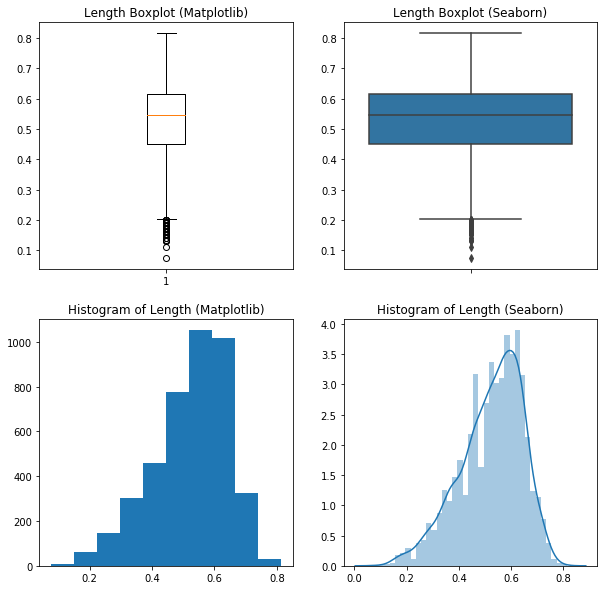

In [17]:
# side-by-side boxplot and histogram Matplotlib and Seaborn for length attribute
ab_length = ab2['Length']

# define a new figure for plotting
plt.figure(figsize=(10,10))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(221)

# Matplotlib boxplot for length
plt.boxplot(x=ab_length)

# give the plot a title
plt.title('Length Boxplot (Matplotlib)')

#subplot that will appear on the righthand side of our 2x2
# subplot ('122' = 1x2, position 2)
plt.subplot(222)

# Seaborn boxplot for length
sns.boxplot(tuple(ab_length),orient='v')

# give the plot a title
plt.title('Length Boxplot (Seaborn)')

#subplot that will appear on the 2nd row of the lefthand side of our 2x2
plt.subplot(223)

#Matlplotlib histogram for length
plt.hist(tuple(ab_length))
plt.title('Histogram of Length (Matplotlib)')

#subplot that will appear on the 2nd row of the righthand side of our 2x2
plt.subplot(224)

#Seaborn histogram for length
sns.distplot(tuple(ab_length))

plt.title('Histogram of Length (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for length is approximately 0.55. In addition, it gives us an idea that there are more outliers and extreme values at the lower end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the length attribute. Based on the histogram, the shape of the observations for the length attribute is skewed to the left. This is because there were a lot of outliers/extreme values at the lower end of the tail which is also what the boxplot showed us and affected the value of the mean making it less than the value of the median.

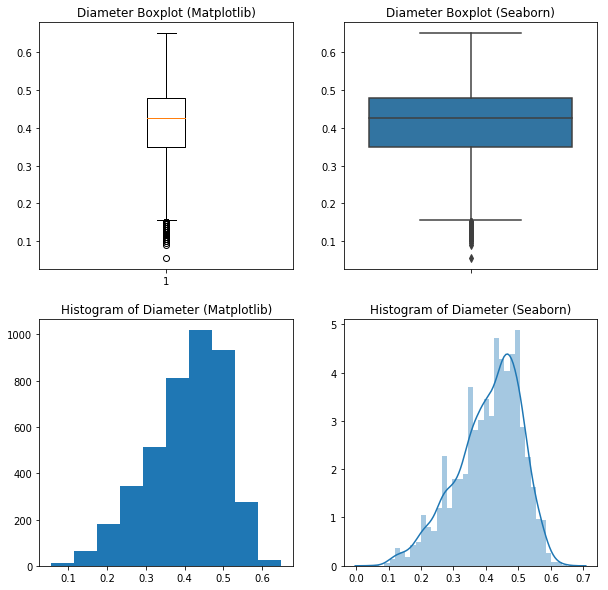

In [18]:
# side-by-side boxplot and histogram Matplotlib and Seaborn for diameter attribute
ab_diameter = ab2['Diameter']

# define a new figure for plotting
plt.figure(figsize=(10,10))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(221)

# Matplotlib boxplot for diameter
plt.boxplot(x=ab_diameter)

# give the plot a title
plt.title('Diameter Boxplot (Matplotlib)')

#subplot that will appear on the righthand side of our 2x2
# subplot ('122' = 1x2, position 2)
plt.subplot(222)

# Seaborn boxplot for diameter
sns.boxplot(tuple(ab_diameter),orient='v')

# give the plot a title
plt.title('Diameter Boxplot (Seaborn)')

#subplot that will appear on the 2nd row of the lefthand side of our 2x2
plt.subplot(223)

#Matlplotlib histogram for diameter
plt.hist(tuple(ab_diameter))
plt.title('Histogram of Diameter (Matplotlib)')

#subplot that will appear on the 2nd row of the righthand side of our 2x2
plt.subplot(224)

#Seaborn histogram for diameter
sns.distplot(tuple(ab_diameter))

plt.title('Histogram of Diameter (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for diameter is approximately 0.42. In addition, it gives us an idea that there are more outliers and extreme values at the lower end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the diameter attribute. Based on the histogram, the shape of the observations for the diameter attribute is skewed to the left. This is because there were a lot of outliers/extreme values at the lower end of the tail which is also what the boxplot showed us and affected the value of the mean making it less than the value of the median..

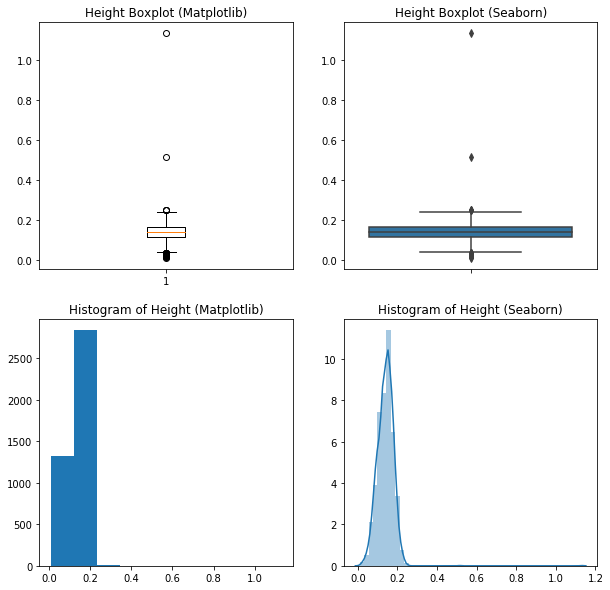

In [19]:
# side-by-side boxplot and histogram Matplotlib and Seaborn for height attribute
ab_height = ab2['Height']

# define a new figure for plotting
plt.figure(figsize=(10,10))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(221)

# Matplotlib boxplot for height
plt.boxplot(x=ab_height)

# give the plot a title
plt.title('Height Boxplot (Matplotlib)')

#subplot that will appear on the righthand side of our 2x2
# subplot ('122' = 1x2, position 2)
plt.subplot(222)

# Seaborn boxplot for height
sns.boxplot(tuple(ab_height),orient='v')

# give the plot a title
plt.title('Height Boxplot (Seaborn)')

#subplot that will appear on the 2nd row of the lefthand side of our 2x2
plt.subplot(223)

#Matlplotlib histogram for height
plt.hist(tuple(ab_height))
plt.title('Histogram of Height (Matplotlib)')

#subplot that will appear on the 2nd row of the righthand side of our 2x2
plt.subplot(224)

#Seaborn histogram for height
sns.distplot(tuple(ab_height))

plt.title('Histogram of Height (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for diameter is approximately 0.1. In addition, it gives us an idea that were a few outliers and/or extreme values at both ends of the tail. However, there are really 2 extreme values at the higher end of the tail one is about 0.5 while the other one is the maximum value which is above 1.

- Histogram: The histogram proves the result of the descriptive statistics for the height attribute. Based on the histogram, especially the seaborn plot that shows the density curve, the shape of the observations for the height attribute is looks like a bell shaped curve or is almost normal. This is if we ignore or do not take into account the 2 outliers at the higher end of the tail that was found in the boxplot.

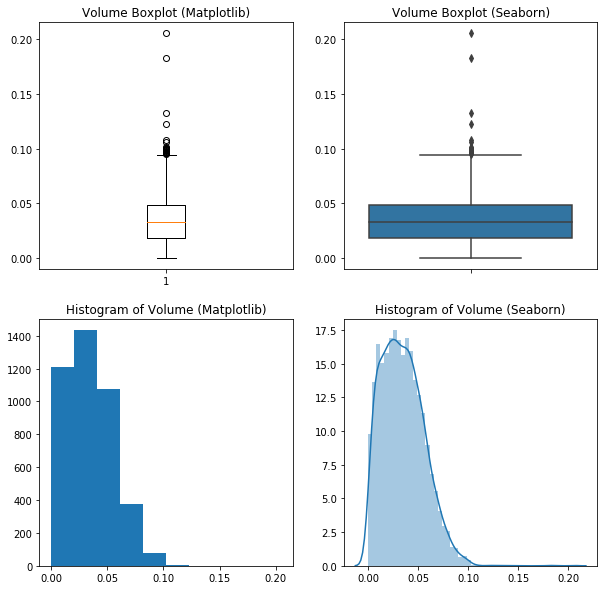

In [20]:
# side-by-side boxplot and histogram Matplotlib and Seaborn for volume attribute
ab_volume = ab2['Volume']

# define a new figure for plotting
plt.figure(figsize=(10,10))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(221)

# Matplotlib boxplot for volume
plt.boxplot(x=ab_volume)

# give the plot a title
plt.title('Volume Boxplot (Matplotlib)')

#subplot that will appear on the righthand side of our 2x2
# subplot ('122' = 1x2, position 2)
plt.subplot(222)

# Seaborn boxplot for volume
sns.boxplot(tuple(ab_volume),orient='v')

# give the plot a title
plt.title('Volume Boxplot (Seaborn)')

#subplot that will appear on the 2nd row of the lefthand side of our 2x2
plt.subplot(223)

#Matlplotlib histogram for volume
plt.hist(tuple(ab_volume))
plt.title('Histogram of Volume (Matplotlib)')

#subplot that will appear on the 2nd row of the righthand side of our 2x2
plt.subplot(224)

#Seaborn histogram for volume
sns.distplot(tuple(ab_volume))

plt.title('Histogram of Volume (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for volume is approximately between 0.03 and 0.04. In addition, it gives us an idea that there are more outliers and extreme values at the upper end of its tail. There were around 2-4 extreme values for this attribute at the upper end of the tail as seen on the chart.

- Histogram: The histogram proves the result of the descriptive statistics for the volume attribute. Based on the histogram, the shape of the observations for the volume attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the upper end of the tail which is also what the boxplot showed us and affected the value of the mean making it greater than the median.

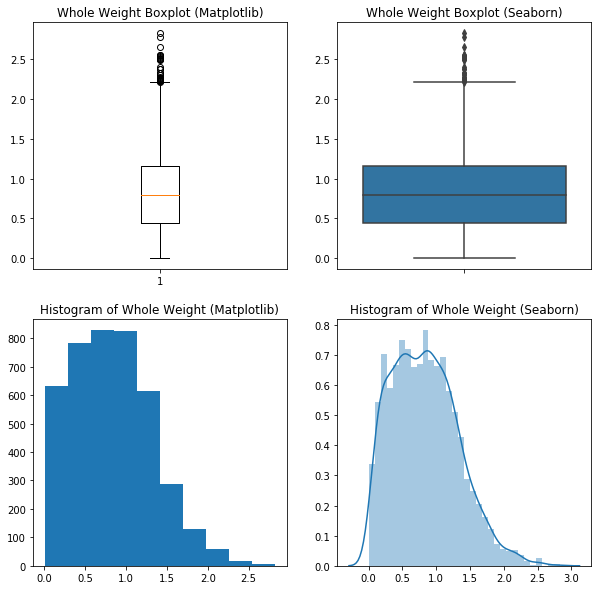

In [25]:
# side-by-side boxplot and histogram Matplotlib and Seaborn for whole weight attribute
ab_whole = ab2['Whole_weight']

# define a new figure for plotting
plt.figure(figsize=(10,10))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(221)

# Matplotlib boxplot for whole weight
plt.boxplot(x=ab_whole)

# give the plot a title
plt.title('Whole Weight Boxplot (Matplotlib)')

#subplot that will appear on the righthand side of our 2x2
# subplot ('122' = 1x2, position 2)
plt.subplot(222)

# Seaborn boxplot for whole weight
sns.boxplot(tuple(ab_whole),orient='v')

# give the plot a title
plt.title('Whole Weight Boxplot (Seaborn)')

#subplot that will appear on the 2nd row of the lefthand side of our 2x2
plt.subplot(223)

#Matlplotlib histogram for whole weight
plt.hist(tuple(ab_whole))
plt.title('Histogram of Whole Weight (Matplotlib)')

#subplot that will appear on the 2nd row of the righthand side of our 2x2
plt.subplot(224)

#Seaborn histogram for whole weight
sns.distplot(tuple(ab_whole))

plt.title('Histogram of Whole Weight (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for volume is at 0.8. In addition, it gives us an idea that there are more outliers and extreme values at the upper end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the whole weight attribute. Based on the histogram, the shape of the observations for the whole weight attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the upper end of the tail which is also what the boxplot showed us and affected the value of the mean making it greater than the median.

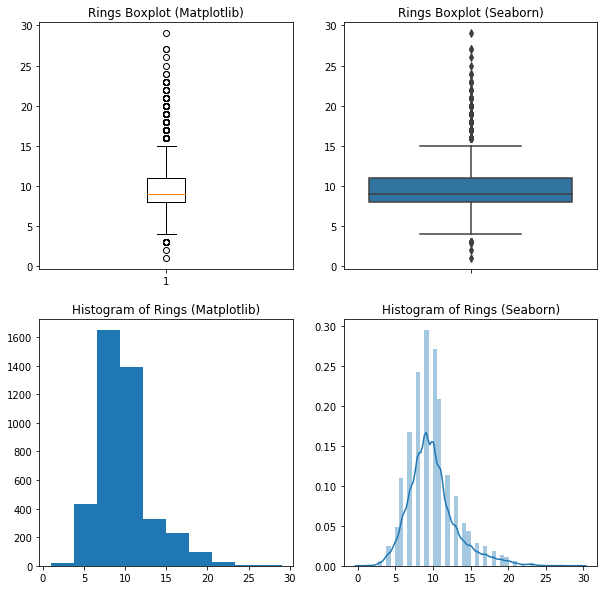

In [26]:
# side-by-side boxplot and histogram Matplotlib and Seaborn for rings attribute
ab_rings = ab2['Rings']

# define a new figure for plotting
plt.figure(figsize=(10,10))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(221)

# Matplotlib boxplot for whole weight
plt.boxplot(x=ab_rings)

# give the plot a title
plt.title('Rings Boxplot (Matplotlib)')

#subplot that will appear on the righthand side of our 2x2
# subplot ('122' = 1x2, position 2)
plt.subplot(222)

# Seaborn boxplot for rings
sns.boxplot(tuple(ab_rings),orient='v')

# give the plot a title
plt.title('Rings Boxplot (Seaborn)')

#subplot that will appear on the 2nd row of the lefthand side of our 2x2
plt.subplot(223)

#Matlplotlib histogram for whole weight
plt.hist(tuple(ab_rings))
plt.title('Histogram of Rings (Matplotlib)')

#subplot that will appear on the 2nd row of the righthand side of our 2x2
plt.subplot(224)

#Seaborn histogram for whole weight
sns.distplot(tuple(ab_rings))

plt.title('Histogram of Rings (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for rings is about 9. In addition, there are outliers/extreme values at both sides of the tail but there are more outliers/extreme values at the higher end of the tail

- Histogram: The histogram proves the result of the descriptive statistics for the rings attribute. Based on the histogram, the shape of the observations for the rings attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the upper end of the tail which is also what the boxplot showed us and affected the value of the mean making it greater than the median.

## Part 4: Inference ##

#### Part 4A: Inference: Answer to questions 1 and 2 ####

This section of the inference will answer the first three questions as discussed in the statement of the problem above. These are:
1. Is there a relationship between the individual attributes, that is, length, diameter, and height vs. the abalone's number of rings? 
2. Based on the conclusion of the study mentioned above, volume and whole weight are good predictors of age. Thus, we would like to know which one has a stronger relationship between the two. Is it volume or is it whole weight?

In order to determine whether relationship exists between the individual attributes length, diameter, and height, volume, and whole weight with the abalone's number of rings, scatter plots will be created. In summary, scatter plots will be created as follows: length vs. number of rings, diameter vs. number of rings, height vs. number of rings, volume vs. number of rings, and whole weight vs. number of rings. After which, the Pearson's rho correlation coefficient will be calculated for these variables (length, diameter, height, volume, and whole weight) vs. number of rings to find out the type of relationship that exists between the independent variables and dependent variable (number of rings).

#### Scatterplots for Length, Diameter, and Height vs. Number of Rings (Matplotlib and Seaborn) ####

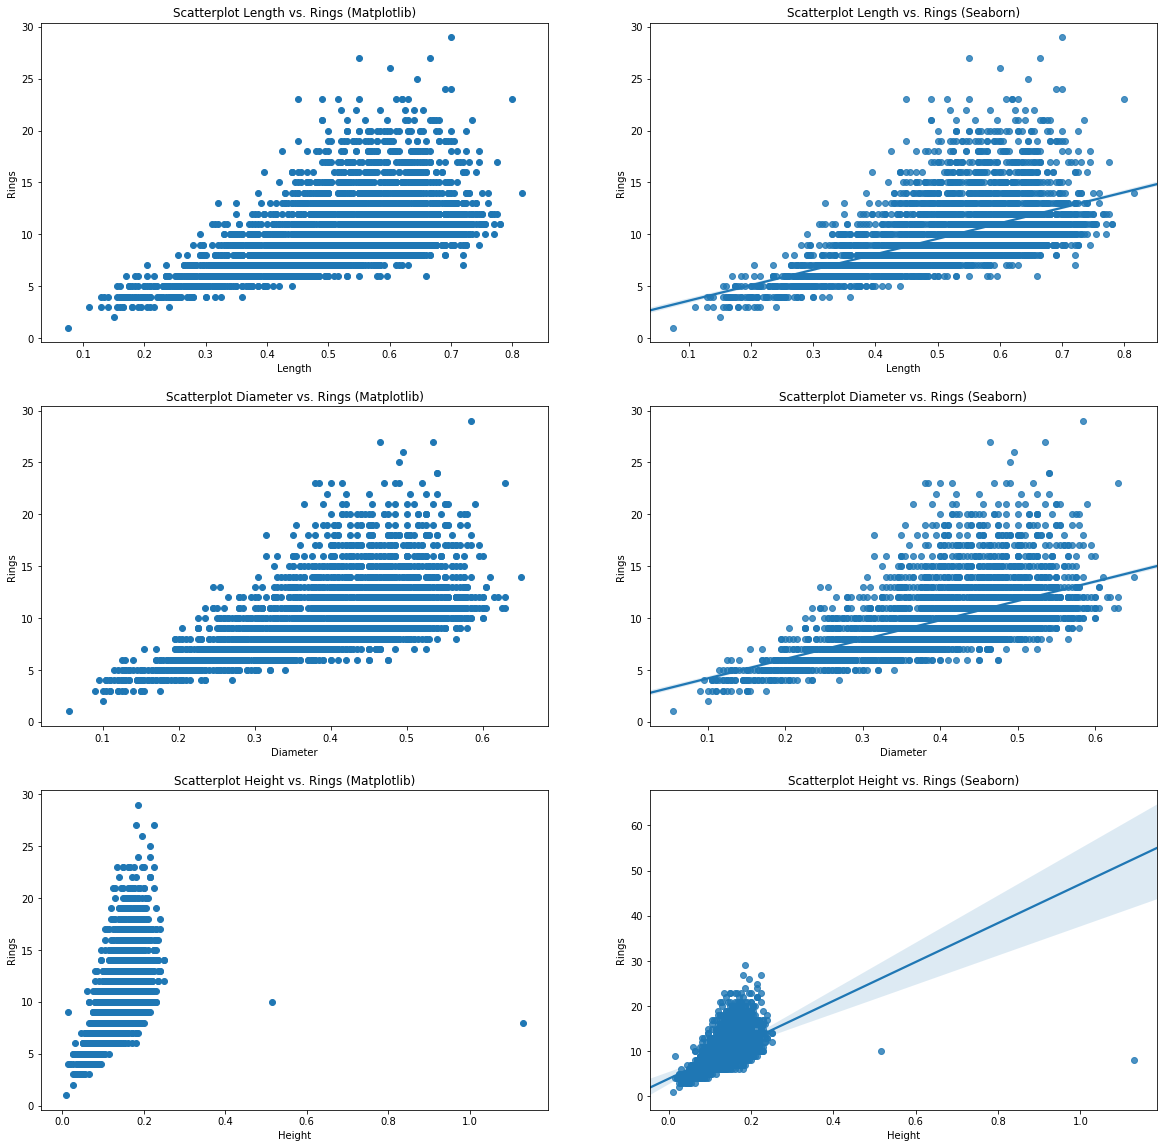

In [56]:
# side-by-side scatterplots Matplotlib and Seaborn
plt.figure(figsize=(20,20))

#plots length vs rings using matplotlib
plt.subplot(321)
plt.scatter(x='Length', y='Rings', data=ab2)
plt.title('Scatterplot Length vs. Rings (Matplotlib)')
plt.xlabel('Length')
plt.ylabel('Rings')

#plots length vs rings using seaborn
plt.subplot(322)
sns.regplot(x = 'Length',y = 'Rings', data = ab2)
plt.title('Scatterplot Length vs. Rings (Seaborn)')
plt.xlabel('Length')
plt.ylabel('Rings')

#plots diameter vs rings using matplotlib
plt.subplot(323)
plt.scatter(x='Diameter', y='Rings', data=ab2)
plt.title('Scatterplot Diameter vs. Rings (Matplotlib)')
plt.xlabel('Diameter')
plt.ylabel('Rings')

#plots diameter vs rings using seaborn
plt.subplot(324)
sns.regplot(x = 'Diameter',y = 'Rings', data = ab2)
plt.title('Scatterplot Diameter vs. Rings (Seaborn)')
plt.xlabel('Diameter')
plt.ylabel('Rings')

#plots height vs rings using matplotlib
plt.subplot(325)
plt.scatter(x='Height', y='Rings', data=ab2)
plt.title('Scatterplot Height vs. Rings (Matplotlib)')
plt.xlabel('Height')
plt.ylabel('Rings')

#plots height vs rings using seaborn
plt.subplot(326)
sns.regplot(x = 'Height',y = 'Rings', data = ab2)
plt.title('Scatterplot Height vs. Rings (Seaborn)')
plt.xlabel('Height')
plt.ylabel('Rings')

plt.show()

#### Scatterplots for Volume and Whole Weight vs. Number of Rings (Matplotlib and Seaborn) ####

Text(0, 0.5, 'Rings')

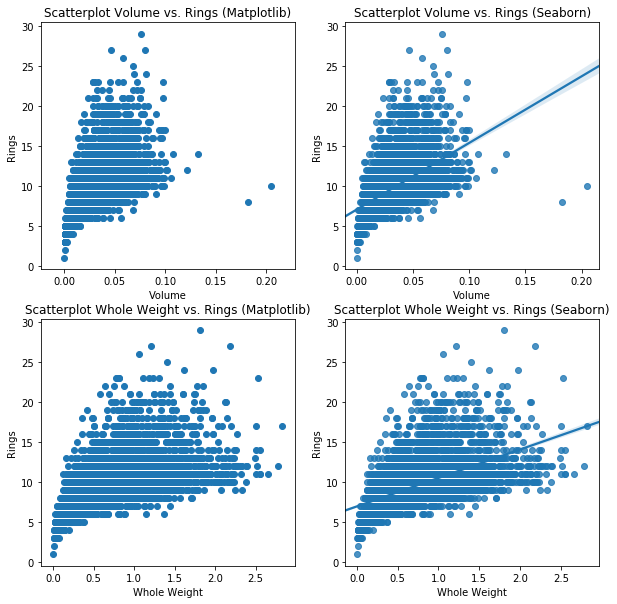

In [86]:
# side-by-side scatterplots Matplotlib and Seaborn
plt.figure(figsize=(10,10))

#plots volume vs rings using matplotlib
plt.subplot(221)
plt.scatter(x='Volume', y='Rings', data=ab2)
plt.title('Scatterplot Volume vs. Rings (Matplotlib)')
plt.xlabel('Volume')
plt.ylabel('Rings')

#plots volume vs rings using seaborn
plt.subplot(222)
sns.regplot(x = 'Volume',y = 'Rings', data = ab2)
plt.title('Scatterplot Volume vs. Rings (Seaborn)')
plt.xlabel('Volume')
plt.ylabel('Rings')

#plots whole weight vs rings using matplotlib
plt.subplot(223)
plt.scatter(x='Whole_weight', y='Rings', data=ab2)
plt.title('Scatterplot Whole Weight vs. Rings (Matplotlib)')
plt.xlabel('Whole Weight')
plt.ylabel('Rings')

#plots whole weight vs rings using seaborn
plt.subplot(224)
sns.regplot(x = 'Whole_weight',y = 'Rings', data = ab2)
plt.title('Scatterplot Whole Weight vs. Rings (Seaborn)')
plt.xlabel('Whole Weight')
plt.ylabel('Rings')

#### Running the Pearson Rho Correlation Coefficient to check for Linear Relationship ####

In [39]:
ab2.corr()

,Length,Diameter,Height,Whole_weight,Rings,Volume
Length,1.000000,0.986802,0.828108,0.925217,0.556464,0.917938
Diameter,0.986802,1.000000,0.834298,0.925414,0.574418,0.923382
Height,0.828108,0.834298,1.000000,0.819886,0.557625,0.905696
Whole_weight,0.925217,0.925414,0.819886,1.000000,0.540151,0.959919
Rings,0.556464,0.574418,0.557625,0.540151,1.000000,0.544709
Volume,0.917938,0.923382,0.905696,0.959919,0.544709,1.000000


**Discussion of Results:** Based on the scatterplots above, you can see that there is a positive relationship between the variables: length vs number of rings, diameter vs number of rings, height vs number of rings, volume vs. number of rings, and whole weight vs. number of rings. This is somehow confirmed by the results of the Pearson-r correlation coefficient. However, it seems that the linear relationship is not that strong because all of the variables taken individually only gives about a 0.5 correlation coefficient in relation to the rings.

With regards to the attributes volume and whole weight however, it seems that volume has a slightly stronger positive linear relationship as compared with whole weight.

#### Part 4B: Inference: Answer to question 3 ####

To find out if categorizing the dataset by sex would change the result of the relationship between volume and number of rings and whole weight and number of rings, scatter plots will again be created but this time, it will be grouped by the sex category. In the same way, the Pearson Rho Correaltion Coefficient will also be ran to check for linear relationship between volume and number of rings and whole weight and number of rings.

In [60]:
#creates three dataframes to filter/group data set by sex
ab_male = ab2[ab2['Sex']=='M']
print(len(ab_male)) #checks if counts are the same as original value counts

ab_female = ab2[ab2['Sex']=='F']
print(len(ab_female)) #checks if counts are the same as original value counts

ab_infant = ab2[ab2['Sex']=='I']
print(len(ab_infant)) #checks if counts are the same as original value counts

1528
1307
1340


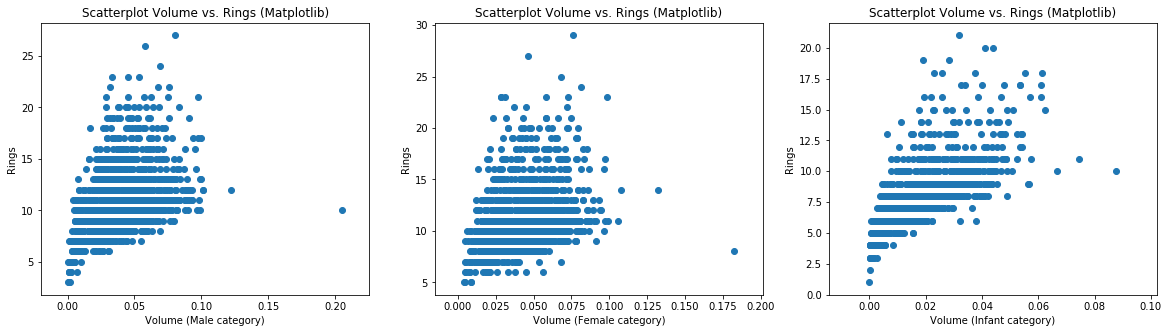

In [87]:
# Scatterplots Volume vs. Number of Rings (Matplotlib)
plt.figure(figsize=(20,5))

#plots volume vs rings for male abalones in matplotlib
plt.subplot(131)
plt.scatter(x='Volume', y='Rings', data=ab_male)
plt.title('Scatterplot Volume vs. Rings (Matplotlib)')
plt.xlabel('Volume (Male category)')
plt.ylabel('Rings')

#plots volume vs rings for female abalones in matplotlib
plt.subplot(132)
plt.scatter(x='Volume', y='Rings', data=ab_female)
plt.title('Scatterplot Volume vs. Rings (Matplotlib)')
plt.xlabel('Volume (Female category)')
plt.ylabel('Rings')

#plots volume vs rings for infant abalones in matplotlib
plt.subplot(133)
plt.scatter(x='Volume', y='Rings', data=ab_infant)
plt.title('Scatterplot Volume vs. Rings (Matplotlib)')
plt.xlabel('Volume (Infant category)')
plt.ylabel('Rings')

plt.show()

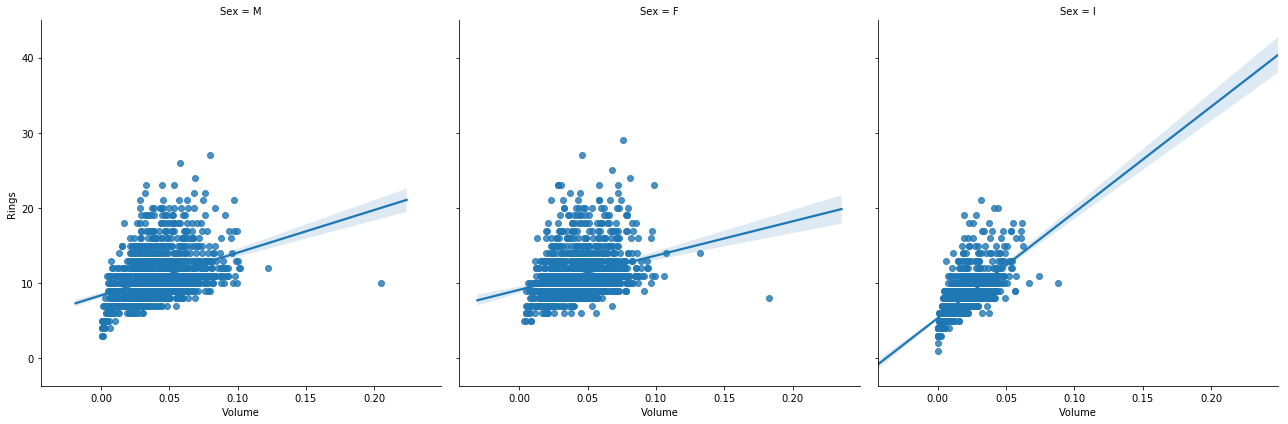

In [85]:
# Scatterplots Volume vs. Number of Rings (Seaborn) Grouped by Sex
sns.lmplot(x="Volume", y="Rings", col="Sex", data=ab2, col_wrap=3, height=6);

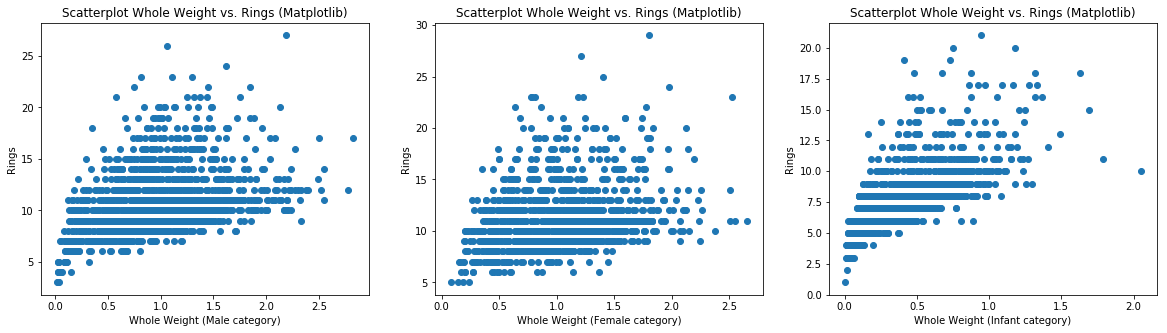

In [70]:
# Scatterplots Whole Weight vs. Number of Rings (Matplotlib)
plt.figure(figsize=(20,5))

#plots whole weight vs rings for male abalones in matplotlib
plt.subplot(131)
plt.scatter(x='Whole_weight', y='Rings', data=ab_male)
plt.title('Scatterplot Whole Weight vs. Rings (Matplotlib)')
plt.xlabel('Whole Weight (Male category)')
plt.ylabel('Rings')

#plots whole weight vs rings for female abalones in matplotlib
plt.subplot(132)
plt.scatter(x='Whole_weight', y='Rings', data=ab_female)
plt.title('Scatterplot Whole Weight vs. Rings (Matplotlib)')
plt.xlabel('Whole Weight (Female category)')
plt.ylabel('Rings')

#plots whole weight vs rings for infant abalones in matplotlib
plt.subplot(133)
plt.scatter(x='Whole_weight', y='Rings', data=ab_infant)
plt.title('Scatterplot Whole Weight vs. Rings (Matplotlib)')
plt.xlabel('Whole Weight (Infant category)')
plt.ylabel('Rings')

plt.show()

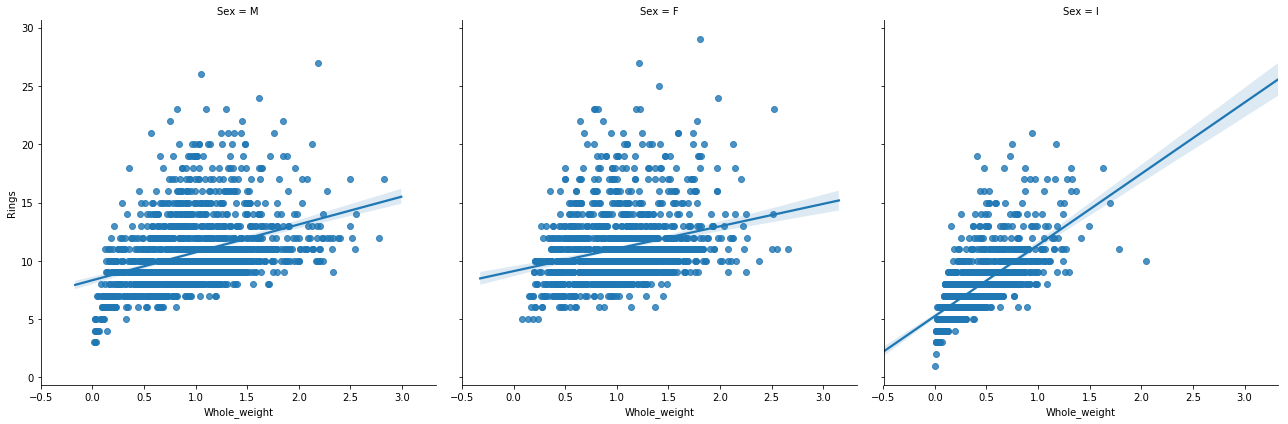

In [71]:
# Scatterplots Whole Weight vs. Number of Rings (Seaborn) Grouped By Sex
sns.lmplot(x="Whole_weight", y="Rings", col="Sex", data=ab2, col_wrap=3, height=6);

#### Scatterplot Volume and Whole Weight vs. Number of Rings by Sex ####

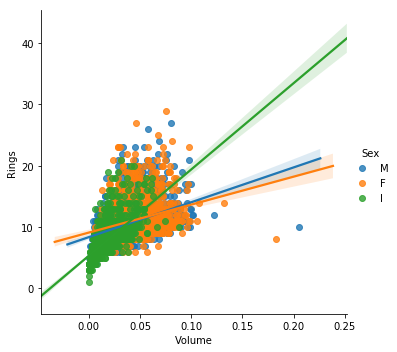

In [82]:
sns.lmplot(x="Volume", y="Rings", hue="Sex", data=ab2);

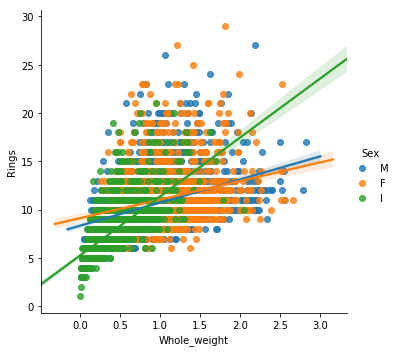

In [84]:
sns.lmplot(x="Whole_weight", y="Rings", hue="Sex", data=ab2);

#### Running the Pearson Rho Correlation Coefficient to check for Linear Relationship (Grouped By Sex) ####

In [72]:
ab2.groupby('Sex').corr()

Diameter    Height    Length     Rings    Volume  \
Sex                                                                  
F   Diameter      1.000000  0.562149  0.971081  0.265888  0.910967   
    Height        0.562149  1.000000  0.553494  0.233904  0.794198   
    Length        0.971081  0.553494  1.000000  0.230610  0.903536   
    Rings         0.265888  0.233904  0.230610  1.000000  0.280987   
    Volume        0.910967  0.794198  0.903536  0.280987  1.000000   
    Whole_weight  0.925641  0.583747  0.929116  0.266759  0.923348   
I   Diameter      1.000000  0.919151  0.986109  0.694922  0.932502   
    Height        0.919151  1.000000  0.914141  0.724592  0.931788   
    Length        0.986109  0.914141  1.000000  0.685835  0.926794   
    Rings         0.694922  0.724592  0.685835  1.000000  0.705212   
    Volume        0.932502  0.931788  0.926794  0.705212  1.000000   
    Whole_weight  0.923644  0.897052  0.920936  0.696172  0.973793   
M   Diameter      1.000000  0.840801  0.981907  0.388910  0.915217   
    Height        0.840801  1.000000  0.832620  0.429722  0.929278   
    Length        0.981907  0.832620  1.000000  0.366646  0.910966   
    Rings         0.388910  0.429722  0.366646  1.000000  0.380211   
    Volume        0.915217  0.929278  0.910966  0.380211  1.000000   
    Whole_weight  0.913128  0.842791  0.918292  0.372197  0.947566   

                  Whole_weight  
Sex                             
F   Diameter          0.925641  
    Height            0.583747  
    Length            0.929116  
    Rings             0.266759  
    Volume            0.923348  
    Whole_weight      1.000000  
I   Diameter          0.923644  
    Height            0.897052  
    Length            0.920936  
    Rings             0.696172  
    Volume            0.973793  
    Whole_weight      1.000000  
M   Diameter          0.913128  
    Height            0.842791  
    Length            0.918292  
    Rings             0.372197  
    Volume            0.947566  
    Whole_weight      1.000000

**Discussion of Results:** Based on the scatterplots above, you can see that when you categorize the dataset by sex, you can still see that there is a positive relationship between volume and rings and also whole weight and rings. However, it is interesting to highlight that the linear relationship between volume and rings and whole weight and rings became weaker for the male and female abalones as compared with the infant wherein the positive linear relationship was the strongest for these variables. This is confirmed by the pearson r coefficient wherein for volume, the result was 0.705 for infant (volume vs. rings) and 0.696 (whole weight vs. rings). While, for male it was only 0.380 (volume vs. rings) and 0.372 (whole weight vs. rings) and for female, 0.281 (volume vs. rings) and 0.267 (whole weight vs. rings). This confirms the result of the previous study that their model is able to predict the age of the abalones and it is more accurate for infant abalones.

## Part 5: Conclusion ##

Based on the results of the exploratory data analysis, we arrive at the following conclusions:

**1. Is there a relationship between the individual attributes, that is, length, diameter, and height vs. the abalone's number of rings?**

There is a positive relationship between the individual attributes length, diameter, and height vs. the abalone's number of rings. The relationship is also a linear positive relationship however, it is not that strong since the pearson rho correlation coefficient is only at about 0.5.

**2. Based on the conclusion of the study mentioned above, volume and whole weight are good predictors of age. Thus, we would like to know which one has a stronger relationship between the two. Is it volume or is it whole weight?**

After comparing the scatter plots for volume and whole weight, we found out that volume has a stronger relationship than whole weight. This is confirmed by the pearson r correlation coefficient wherein the value is higher for volume vs. number of rings as compared with whole weight vs. number of rings.

**3. Lastly, the study also said that it is a better predictor when it comes to the infant or I sex group. Thus, we would like to know the effect of grouping the dataset by sex and comparing the relationship between volume and whole weight and the number of rings to confirm the results of the previous study.**

We found out that the "infant" group has the strongest positive linear relationship compared with "female" and "male" group. This means that the linear model for predicting for age of abalones will be more accurate for the "infant" group vs. "female" and "male" group. This also confirms the results of the study referenced in this project.

## References ##

Study Referenced: [link] http://rstudio-pubs-static.s3.amazonaws.com/9807_2d1e24ad750144d5aaca5e09243a1113.html

Other References:

- [link] https://blogs.wsj.com/scene/2010/10/18/the-13-million-abalone-stash/
- [link] https://en.wikipedia.org/wiki/Abalone
- [link] https://halejessie.wordpress.com/2012/03/05/what-are-abalone-and-why-are-they-so-awesome/
- [link] https://www.foodrepublic.com/2014/05/19/mad-for-mollusks-what-exactly-is-abalone-and-why-do-we-love-it-so-much/
- [link] http://www.ausab.com.au/abalone/abalone-health-benefits/